In [37]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [38]:
AR0 = []
x0 = 0
s = 0.25
length = 1000
for _ in range(length):
    e = np.random.normal(scale=s)
    AR0.append(e)
    
AR0 = np.array(AR0)

In [39]:
AR1 = [0]
x0 = 0
a = 0.5
s = 0.25
length = 1000
for _ in range(length):
    e = np.random.normal(scale=s)
    AR1.append(a*AR1[-1]+e)
    
AR1 = np.array(AR1)

In [40]:
spectrumAR1 = lambda f: s**2/(1-2*a*np.cos(2*np.pi*f)+a**2)
# plt.plot(f, spectrumAR1(f))

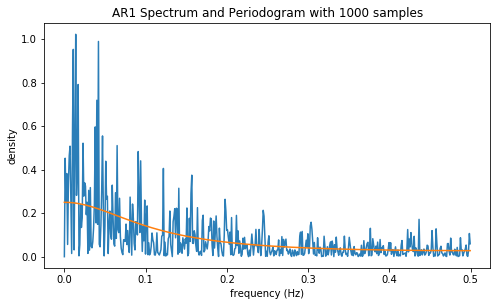

In [41]:
import scipy

f, spec = scipy.signal.periodogram(AR1)

plt.figure(figsize=(16/2,9/2))
plt.plot(f,spec/2, alpha=0.95)

plt.plot(f, spectrumAR1(f))
plt.title('AR1 Spectrum and Periodogram with 1000 samples')
plt.xlabel('frequency (Hz)')
plt.ylabel('density')
plt.savefig('AR1PerSpec1000.png', transparent=True)

In [42]:
AR1 = [0]
x0 = 0
a = 0.5
s = 0.25
length = 100000
for _ in range(length):
    e = np.random.normal(scale=s)
    AR1.append(a*AR1[-1]+e)
    
AR1 = np.array(AR1)

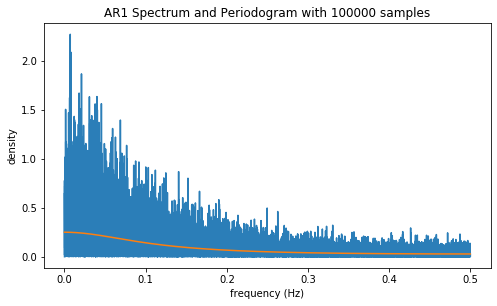

In [43]:
import scipy

f, spec = scipy.signal.periodogram(AR1)

plt.figure(figsize=(16/2,9/2))
plt.plot(f,spec/2, alpha=0.95)

plt.plot(f, spectrumAR1(f))
plt.title('AR1 Spectrum and Periodogram with 100000 samples')
plt.xlabel('frequency (Hz)')
plt.ylabel('density')
plt.savefig('AR1PerSpec100000.png', transparent=True)

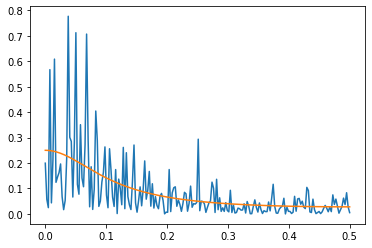

In [54]:
AR1 = [0]
x0 = 0
a = 0.5
s = 0.25
length = 2000
for _ in range(length):
    e = np.random.normal(scale=s)
    AR1.append(a*AR1[-1]+e)
    
AR1 = np.array(AR1)

ts = AR1
def S(omega):
    t_arr = np.linspace(0, 1, len(ts))
    _s = np.sum(np.array(ts)*np.exp(-2*np.pi*t_arr*1j*omega))
    _s = np.abs(_s)**2
    return _s/len(ts)

vS = np.vectorize(S)

omega_arr = np.linspace(0,0.5*len(AR1), 200)
plt.plot(omega_arr/len(AR1), vS(omega_arr))

plt.plot(f, spectrumAR1(f))

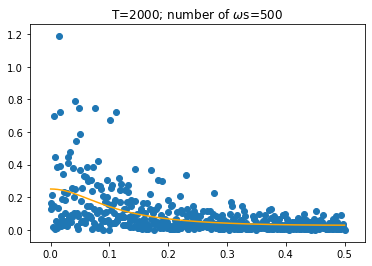

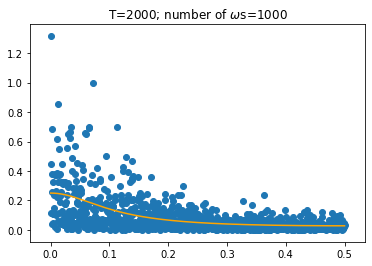

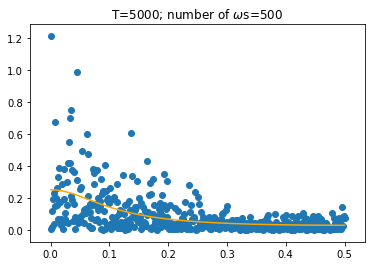

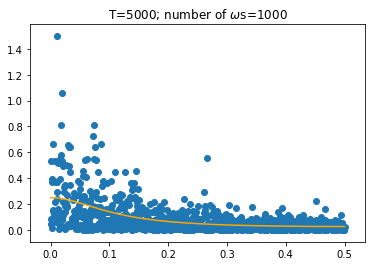

In [72]:
n_ts_arr = [2000,5000]

n_omega_arr = [500,1000]


for n_ts in n_ts_arr:
    for n_omega in n_omega_arr:

        AR1 = [0]
        x0 = 0
        a = 0.5
        s = 0.25
        length = n_ts
        for _ in range(length):
            e = np.random.normal(scale=s)
            AR1.append(a*AR1[-1]+e)

        AR1 = np.array(AR1)

        ts = AR1
        def S(omega):
            t_arr = np.linspace(0, 1, len(ts))
            _s = np.sum(np.array(ts)*np.exp(-2*np.pi*t_arr*1j*omega))
            _s = np.abs(_s)**2
            return _s/len(ts)

        vS = np.vectorize(S)

        omega_arr = np.linspace(0,0.5*len(AR1), n_omega)
        plt.figure()
        plt.scatter(omega_arr/len(AR1), vS(omega_arr))
        plt.plot(f, spectrumAR1(f), color='orange')
        plt.title(r'T=%i; number of $\omega$s=%i'%(n_ts, n_omega))